In [11]:
import numpy as np
import os
import torch
content_path = '/home/yiming/ContrastDebugger/EXP/codesearch_query'
model_path  = os.path.join(content_path)
ENCODER_DIMS= [128,64,64,64,64,2]
DECODER_DIMS= [2,64,64,64,64,128]
GPU_ID = 0
PATIENT = 5
MAX_EPOCH = 10
Epoch_name = 'Epoch_'
S_N_EPOCHS = 5
VIS_MODEL_NAME = 'dvi'
DEVICE = torch.device("cuda:{}".format(GPU_ID) if torch.cuda.is_available() else "cpu")

In [12]:
def get_epoch_plot_measures(embedded):
  

        ebd_min = np.min(embedded, axis=0)
        ebd_max = np.max(embedded, axis=0)
        ebd_extent = ebd_max - ebd_min

        x_min, y_min = ebd_min - 0.1 * ebd_extent
        x_max, y_max = ebd_max + 0.1 * ebd_extent

        x_min = min(x_min, y_min)
        y_min = min(x_min, y_min)
        x_max = max(x_max, y_max)
        y_max = max(x_max, y_max)

        return x_min, y_min, x_max, y_max

In [13]:
from singleVis.SingleVisualizationModel import VisModel
from PIL import Image

# for Epoch in range(1,2):
Epoch = 1
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
train_representation = np.load(os.path.join(model_path, '{}{}'.format(Epoch_name,Epoch), 'train_data.npy'))
test_representation = np.load(os.path.join(model_path, '{}{}'.format(Epoch_name,Epoch), 'test_data.npy'))
file_path = os.path.join(content_path, '{}{}'.format(Epoch_name,Epoch), "{}.pth".format(VIS_MODEL_NAME))
save_model = torch.load(file_path, map_location="cpu")
model.load_state_dict(save_model["state_dict"])
model.to(DEVICE)
model.eval()
# emb = model.encoder(torch.from_numpy(train_representation).to(dtype=torch.float32, device=DEVICE)).cpu().detach().numpy()
# x_min, y_min, x_max, y_max = get_epoch_plot_measures(emb)
# print(x_min, y_min, x_max, y_max )
# scale_path =  os.path.join(content_path, "Epoch_{}".format( Epoch), "scale.npy")
# np.save(scale_path,[x_min, y_min, x_max, y_max])

# img = Image.new("RGB",(200,200),(255,255,255))
# bgimg_path = os.path.join(content_path, "Epoch_{}".format( Epoch), "bgimg.png")

# img.save(bgimg_path)
# data = np.concatenate((train_representation,test_representation),axis=0)
#### save embeddings and background for visualization
emb = model.encoder(torch.from_numpy(train_representation).to(dtype=torch.float32, device=DEVICE)).cpu().detach().numpy()
np.save(os.path.join(content_path, 'Epoch_{}'.format(Epoch), 'embedding.npy'), emb)
    

ModuleNotFoundError: No module named 'singleVis'

In [14]:
Epoch = 1
train_representation = np.load(os.path.join(model_path,'Model', '{}{}'.format(Epoch_name,Epoch), 'train_data.npy'))

In [15]:
code1 = train_representation[346702]
code2 = train_representation[342928]
code3 = train_representation[49479]
code4 = train_representation[90792]


In [16]:
euclidean_distance_1 = np.linalg.norm(code1 - code2)
euclidean_distance_2 = np.linalg.norm(code1 - code3)
euclidean_distance_3 = np.linalg.norm(code3 - code4)
print(euclidean_distance_1)
print(euclidean_distance_2)
print(euclidean_distance_3)

1.9433701
3.9611351
0.89250124


In [9]:
data = np.concatenate((train_representation,test_representation),axis=0)
##### save embeddings and background for visualization
emb = model.encoder(torch.from_numpy(data).to(dtype=torch.float32, device=DEVICE)).cpu().detach().numpy()
np.save(os.path.join(content_path, 'Epoch_{}'.format(Epoch), 'embedding.npy'), emb)

In [16]:
label_list = np.array([0]).repeat(len(emb))

In [18]:
label_list.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


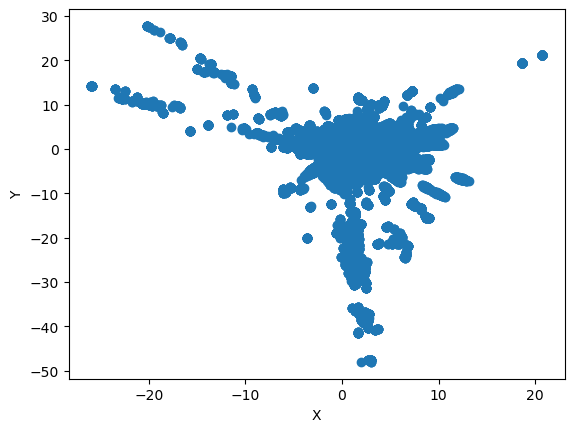

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(emb[:, 0], emb[:, 1])

plt.xlabel("X")
plt.ylabel("Y")

# 显示图形
plt.show()

In [2]:
res_test = []
with open (r'/home/yifan/full_checkpoint/dataset/test.txt', 'r') as f:
    for line in f:
        res_test.append(line)